Total points for this HW: 100. Bonus points: 10.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

If for real estate data, if we were to predict sales price or price per sq ft of a house, the factors affecting the sale price depends of floor area, locality of the building, height, type of the house or building. For such cases interpretability becomes more important as the variables affecting the price are many, but we may might find a certain order between them. Its important to find the price range that a particular house might fit into, to keep space for certain negotiation rather than fixing on an accurate price.
In this regard, using descision trees becomes preferable as its easy to interpret results of the variable with faster training time for the model. Using Descision trees is also important for making a quick data driven descision to bargain or increase a sale price of a house with the model and good justification can be provided for increase or decrease of sale price.  

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

For certain cases like a global pandemic, accuracy of the model is of paramount importance to distribute civic, hospital and staff government resources across locations, subject to which areas would be the most affected in future and how many people would be tested positive . If we can accurately predict a model for this, efficient use of taxpayers money could be achieved but if the accuracy of the model decreased if would be hard to allocate resources. As screening population is a very large dataset, along with accuracy keeping track of spread of virus becomes difficult through a single descision tree, therefore a random forrest classifier becomes more usefull considering its a aggregation of different descision classifiers, so the probability of it being right is more.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

One of the method to interpret models could be to set up the gini importance of each variable to reflect on which variable could be most affecting the model. With the order of sequencing we can find out the said correlation of the variable and the predictor and perform a bottom up approach to interpret the model through these variables.We could also make a reverse tree on a random forrest by finding the mean model between a set of each bootstrap aggregator and trying to interpret it. The global idea of these mean models could help us beeter understand the final output.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
df['MPG'].value_counts()

bad     15
good     5
Name: MPG, dtype: int64

In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [5]:
df1 =df[df['cylinders']<=4]
df2 =df[df['cylinders']>4]
print(df1['MPG'].unique())



df1['MPG'].value_counts().get('good',0)

['good' 'bad']


5

In [6]:
def threshold(a):
    df1 =df[df['cylinders']==a]
    df2 =df[df['cylinders']!=a]
    b=df1['MPG'].value_counts().get('good',0) if df1['MPG'].value_counts().get('good',0) >0 else 0
    c=df1['MPG'].value_counts().get('bad',0) if df1['MPG'].value_counts().get('bad',0) >0 else 0
    d=df2['MPG'].value_counts().get('good',0) if df2['MPG'].value_counts().get('good',0)>0  else 0
    e=df2['MPG'].value_counts().get('bad',0) if df2['MPG'].value_counts().get('bad',0) >0 else 0
    return b,c,d,e
    

In [7]:
print(threshold(4))       
value1 = InformationGain(5,4,0,11)
value1



(5, 4, 0, 11)


0.3652938975319328

In [8]:
print(threshold(6))
value2 = InformationGain(0,6,5,9)
value2

(0, 6, 5, 9)


0.15307795338969116

In [9]:
print(threshold(8))
value3 = InformationGain(0,5,5,10)
value3

(0, 5, 5, 10)


0.1225562489182657

In [10]:
def threshold_(a):
    df1 =df[df['weight']==a]
    df2 =df[df['weight']!=a]
    b=df1['MPG'].value_counts().get('good',0) if df1['MPG'].value_counts().get('good',0) >0 else 0
    c=df1['MPG'].value_counts().get('bad',0) if df1['MPG'].value_counts().get('bad',0) >0 else 0
    d=df2['MPG'].value_counts().get('good',0) if df2['MPG'].value_counts().get('good',0)>0  else 0
    e=df2['MPG'].value_counts().get('bad',0) if df2['MPG'].value_counts().get('bad',0) >0 else 0
    return b,c,d,e

In [11]:
print(threshold_('light'))
value_light = InformationGain(3,3,2,12)
value_light

(3, 3, 2, 12)


0.09710717945150363

In [12]:
print(threshold_('medium'))
value_medium = InformationGain(2,6,3,9)
value_medium

(2, 6, 3, 9)


0.0

In [13]:
print(threshold_('weighty'))
value_weighty = InformationGain(0,6,5,9)
value_weighty

(0, 6, 5, 9)


0.15307795338969116

In [14]:
def threshold_b(a):
    df1 =df[df['HP']<=a]
    df2 =df[df['HP']>a]
    b=df1['MPG'].value_counts().get('good',0) if df1['MPG'].value_counts().get('good',0) >0 else 0
    c=df1['MPG'].value_counts().get('bad',0) if df1['MPG'].value_counts().get('bad',0) >0 else 0
    d=df2['MPG'].value_counts().get('good',0) if df2['MPG'].value_counts().get('good',0)>0  else 0
    e=df2['MPG'].value_counts().get('bad',0) if df2['MPG'].value_counts().get('bad',0) >0 else 0
    return b,c,d,e

In [15]:
print(df['HP'].mean())
print(df['HP'].max())
print(df['HP'].min())



108.9
190
65


In [16]:
print(threshold_b(108.9))
value4 = InformationGain(5,9,0,6)
value4

(5, 9, 0, 6)


0.15307795338969116

In [17]:
print(threshold_b(87))
value5 = InformationGain(3,1,2,14)
value5


(3, 1, 2, 14)


0.21417094500762923

In [18]:
print(threshold_b(150))
value6 = InformationGain(5,12,0,3)
value6


(5, 12, 0, 3)


0.06839423355087862

In [19]:
print(threshold_b(130))
value7 = InformationGain(5,10,0,5)
value7


(5, 10, 0, 5)


0.1225562489182657

In [20]:
print(threshold_b(92))
value8 = InformationGain(5,2,0,13)
value8


(5, 2, 0, 13)


0.5091859254608121

In [21]:
print(threshold_b(75))
value9 = InformationGain(2,0,3,15)
value9


(2, 0, 3, 15)


0.22625794497561413

In [22]:
print(threshold_b(100))
value10 = InformationGain(5,9,0,6)
value10


(5, 9, 0, 6)


0.15307795338969116

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [23]:
# Refer Previous step

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

According to the maximum information gain, the optimal binary split of the data is divinding the data by cylinder if they are split by HP >92 .Then dividing the data with the split through HP>75 and later if required divide through HP>87 or HP >100. We can use the weight category for the lower trees as their information gain is less.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [24]:
print(threshold_b(92))       

df_HPl92 = df[df['HP']<92]



(5, 2, 0, 13)


In [25]:
df_HPm75 = df_HPl92[df_HPl92['HP']>=75]
df_HPl75 = df_HPl92[df_HPl92['HP']<75]

print(df_HPm75['MPG'].value_counts())
print(df_HPl75['MPG'].value_counts())




good    3
bad     2
Name: MPG, dtype: int64
good    1
Name: MPG, dtype: int64


In [26]:
df_HPm87 = df_HPm75[df_HPm75['HP']>=87]
df_HPl87 = df_HPm75[df_HPm75['HP']<87]
print(df_HPm87['MPG'].value_counts())
print(df_HPl87['MPG'].value_counts())


good    1
bad     1
Name: MPG, dtype: int64
good    2
bad     1
Name: MPG, dtype: int64


In [27]:
df_wl = df_HPm87[df_HPm87['weight']== 'light']
df_wnl = df_HPm87[df_HPm87['weight']!='light']


print(df_wl['MPG'].value_counts())
print(df_wnl['MPG'].value_counts())




Series([], Name: MPG, dtype: int64)
good    1
bad     1
Name: MPG, dtype: int64


In [28]:
df_cyl4= df_wnl[df_wnl['cylinders']==4]

print(df_cyl4['MPG'].value_counts())


good    1
Name: MPG, dtype: int64


In [29]:
df_wl2= df_HPl87[df_HPl87['weight']== 'light']
df_wnl2= df_HPl87[df_HPl87['weight']!= 'light']
print(df_wl2['MPG'].value_counts())
print(df_wnl2['MPG'].value_counts())


good    2
Name: MPG, dtype: int64
bad    1
Name: MPG, dtype: int64


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

                                                        Descision Tree 
                                           
                                                           DF HP<92
                                         Y                                           N
                                   (5good, 2 bad)                             (0 good, 13 bad)
                                   
                                     DF HP>75
                              Y                     N       
                          (3good,2bad)              (1good, 0 bad)
                    
                              DF HP>87                   
                      Y                        N    
                  (2good,1bad)             (1good,1bad)   
                 weight = light?           cylinder = 4?
                                            
                 Y           N              Y           N
        (2 good, 0 bad)  (0 good, 1 bad)(1 good, 0 bad)(0 good, 1 bad)
                  
                                   
                                   

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

???,4,95,light = bad

???,6,113,medium = bad

???,4,83,weighty = good

???,6,70,weighty = good


### Question 3, Predicting burden of disease （40 pts)

In [30]:
data=pd.read_csv("D:/Shantanu/NYU CUSP/Machine learning for cities/HW assignments/Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Country 1,1.0,0.18,51021,0.69307,0.84158,0.47525,0.70297,0.045,0.443,0.0010,65,6104,0.92475,0.92178,medium
1,Country 2,1.0,0.24,60614,0.58416,0.99010,0.63366,0.95050,0.061,0.488,0.0005,137,12505,0.95248,0.95149,low
2,Country 3,1.0,0.00,3404,0.77228,0.94059,0.94059,0.98020,0.073,0.868,0.0020,183,3649,0.96040,0.95941,low


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [46]:
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing


data=data.dropna()
y=data.loc[:,"BurdenOfDisease"]
X=data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]
X=pd.get_dummies(X)


X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=55)
print(X_train.head())

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


    FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
32            1.0             0.00              25708            0.99010   
76            0.9             0.52              19192            0.40594   
2             1.0             0.00               3404            0.77228   
25            1.0             0.00              21268            0.99010   
90            0.2             0.41               1576            0.86139   

    SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
32            0.99010            0.99010            0.99010   
76            0.83168            0.32673            0.62376   
2             0.94059            0.94059            0.98020   
25            0.99010            0.99010            0.99010   
90            0.94059            0.34653            0.91089   

    TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
32               0.095                   0.675                   0.0005   
76            

DecisionTreeClassifier()

In [66]:
OS=[]
for i in range(2,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)    
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    OS.append(roc_auc_score(y_test,dt.predict_proba(X_test),multi_class = 'ovo'))
print("AUC ROC: ",OS)    

AUC ROC:  [0.7313670126170128, 0.7416666666666667, 0.7970813908313907, 0.7341880341880342, 0.7336052836052837, 0.717948717948718, 0.7226292226292226, 0.7443181818181818]


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

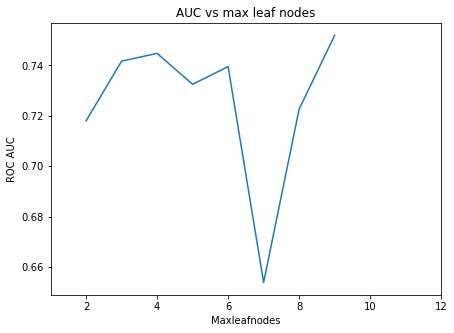

In [62]:
import matplotlib.pylab as plt

plt.figure(figsize=(7,5))
plt.plot(range(2,10),OS)
plt.xlabel("Maxleafnodes")
plt.ylabel("ROC AUC")
plt.title("AUC vs max leaf nodes")
plt.xlim(1,12)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [68]:

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import cross_val_score

param_grid = {'max_depth':range(2,10)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test),multi_class = 'ovo'))

{'max_depth': 2}
0.8244047619047619


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10 pts)

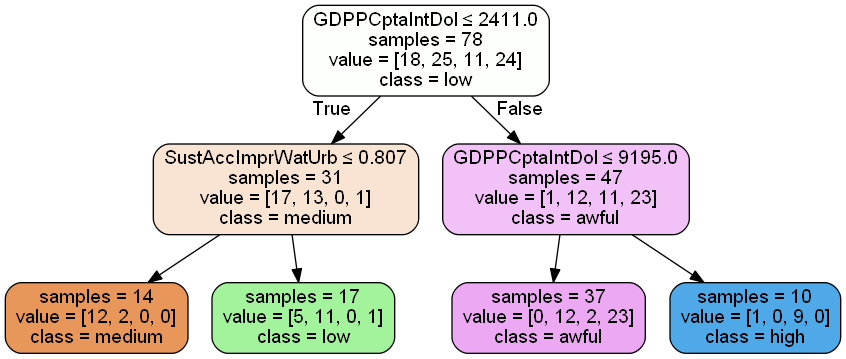

In [71]:
dt = DecisionTreeClassifier(max_depth=rs.best_params_['max_depth']) 
dt.fit(X_train,y_train)


from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['medium', 'low', 'high', 'awful'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20+10 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (20 pts)

In [80]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':range(5,50,5),
              'max_depth' : range(2,10),
    'criterion' :['gini','entropy'],
    'random_state' : [66]}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),pred,multi_class = 'ovo'))

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 5, 'random_state': 66}
0.8629937770562771


The ROC_AUC accuracy in random forrest is slighly greater than the one achieved in 3c The time taken for the random forests was also more.

b) **Bonus:** Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

The two models have achieved similar accuracy, with Random forest model accuracy being slightly more.Taking into consideration the small size of the sample, the interpretability of the decision tree is more and the maximum depth achieved is quite readable. The values therefore, are correlated to the sample size taken. Possibly we can increase on the accuracy by having a large dataset that gives an option to increase the number of estimators and sample size, but that would inturn affect the interpretability of the dataset and the model. For this example the model of decision tree is preferred, as its easier to visualse and interpret and the time taken for running the model was also less in comparison to random forest. The decision tree model would have still been interpretable to an extent had we increased the maximum depth range of the model.